   # Data analysis on electric cars

As the year comes to an end, more and more futuristic technology seems to appear along with innovation with current technology. One of these amazing innovation is the electric car that first appeared in 1832. I know right? Isn't it shocking that the first every crude electric car invented was made by a person named Robert Anderson nearly 200 years ago. These days there are so many electric cars out there made by major car companies around the world, there are several questions into why these car companies are investing in these electric car companies. I mean think about it, it's not like natural gas or oil will run out for many hundreds of years. Well maybe not, however there are so many benefits to driving an electric car and the consquences that could be solved with it.

My approach to this setup or project was to essentially show the the data summary in the beginning to show it in a friendly manner where all users of ages could understand this analysis. My main takeaway that from this entire analysis will essentially showing you the wide variety of electric car options that are avaliable in the market. I feel this is very essential as more people are buying electric cars every year. Globally BEV(Electric cars) sales grew by 75% on the year and PHEVs(Plug in hybrids) by 37% which is astonishing growth for any type of product in any industry. As gas prices increases, more people realise that electric cars are ultimately, a cheaper option along with it being eco-friendly.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import folium





data = pd.read_csv("Electric_Vehicle_Population_Data.csv")
data1 = data
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


### Data retreival

As we recieved the data, we can see the wife variety of information that is shown to us. To list all of them out:

* VIN(1-10) (which is the veihicle Identification)
* County from where the car is from
* The city where the car is located
* The state
* Postal Code
* Model Year
* Make (Car company)
* Model name
* electric type
* Fuel type
* Range
* MSRP
* District
* ID
* Utility
* Census tract

Below we have the rough sketch on what the useful values could be told with formatted code. We can see that we have 34 Unique car models from companies all over the world.

* 'CHEVROLET' 
* 'FORD' 
* 'TOYOTA' 
* 'TESLA' 
* 'NISSAN' 
* 'AZURE DYNAMICS' 
* 'TH!NK'
* 'MITSUBISHI'
* 'FISKER' 
* 'SMART' 
* 'FIAT' 
* 'BMW' 
* 'CADILLAC' 
* 'PORSCHE'
* 'MERCEDES-BENZ' 
* 'HONDA' 
* 'VOLKSWAGEN' 
* 'KIA' 
* 'AUDI' 
* 'VOLVO' 
* 'HYUNDAI'
* 'CHRYSLER'
* 'MINI' 
* 'JAGUAR' 
* 'SUBARU' 
* 'LAND ROVER' 
* 'LINCOLN'
* 'BENTLEY'
* 'JEEP' 
* 'POLESTAR' 
* 'RIVIAN'
* 'LUCID MOTORS' 
* 'LEXUS' 
* 'GENESIS'

We can also see that the oldest car models are from 1997 to 2023, the reason I decided to keep the older generation cars in is because variety of people exist in the world with different incomes. Although highly likely, a person may never buy a car from the 90's or the early 00's that is electric, the possibility is never 0.

In terms of the driven ranges, I was wondering on wheather I should take out the ranges of 0 km, however I still decided to keep them in cause for a few of the electric cars, the hybrids may only allow them to drive electrical for less than an 1km.

In [130]:
print("Number of rows in the dataset:", data.shape[0])
print("Number of columns in the dataset:", data.shape[1])
print("There are {} unique car models available".format(len(data["Make"].unique())))
print ("Manufacturing year of car ranges from {} to {}".format(data['Model Year'].min(), data['Model Year'].max()))
print("Distance driven ranges from {}km to {}km".format(data['Electric Range'].min(), data['Electric Range'].max()))

Number of rows in the dataset: 112634
Number of columns in the dataset: 17
There are 34 unique car models available
Manufacturing year of car ranges from 1997 to 2023
Distance driven ranges from 0km to 337km


While looking at the original data frame, I realised that a lot of the columns were sort of pointless for most users who might want a electric car. With that in mind, I decided to drop columns that I thought would be not the eye catching information required for most car buyers.

In [131]:
useful_data = data.drop(columns=["VIN (1-10)", "Model","Clean Alternative Fuel Vehicle (CAFV) Eligibility","Base MSRP",
                                 "Legislative District","DOL Vehicle ID","Vehicle Location","2020 Census Tract"])
useful_data = useful_data.sort_values("Model Year")
useful_data.head()

,County,City,State,Postal Code,Model Year,Make,Electric Vehicle Type,Electric Range,Electric Utility
28584,Snohomish,Marysville,WA,98270,1997,CHEVROLET,Battery Electric Vehicle (BEV),39,PUGET SOUND ENERGY INC
67278,Clallam,Sequim,WA,98382,1998,FORD,Battery Electric Vehicle (BEV),58,BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
39799,Skagit,Mount Vernon,WA,98274,1999,FORD,Battery Electric Vehicle (BEV),74,PUGET SOUND ENERGY INC
110308,Pierce,Graham,WA,98338,1999,FORD,Battery Electric Vehicle (BEV),74,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
49921,Whatcom,Deming,WA,98244,1999,FORD,Battery Electric Vehicle (BEV),74,PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...


### Data visualization

Here I wanted to show the car companies and their max ranges that thier best electric models could offer. I decided that Instead of showing it to the users through numbers or words, that it was best to use a bar graph. As shown by the bar graph, Tesla, the electric American car company has the car with the highest range which makes sense. Thier standard model which is called the model 3, can go roughly 270 miles with a single charge which is already better than all the other car companies. 
![Model 3 Tesla](https://media.ed.edmunds-media.com/tesla/model-3/2022/oem/2022_tesla_model-3_sedan_performance_fq_oem_1_1280.jpg)


What really surprised me was that cheverlot came in 2nd tied with hyundai because I haven't heard that cheverlot released a new electric car, however they have released a $30,000 new electric SUV.

![Chevy $30,000 EV SUV](https://cimg0.ibsrv.net/ibimg/hgm/1920x1080-1/100/822/chevrolet-equinox_100822952.jpg)


Most of the other car companies have built amazing electric cars but are more geared towards in building quality hybrids. For example the Benz c 300 2022 is a fantastic car that is a hybrid. Other car companies still seem to believe that having an engine that runs on gas is still required for many reasons however, electric cars are becoming way more abundant.



['CHEVROLET' 'FORD' 'TOYOTA' 'TESLA' 'NISSAN' 'AZURE DYNAMICS' 'TH!NK'
 'MITSUBISHI' 'FISKER' 'SMART' 'FIAT' 'BMW' 'CADILLAC' 'PORSCHE'
 'MERCEDES-BENZ' 'HONDA' 'VOLKSWAGEN' 'KIA' 'AUDI' 'VOLVO' 'HYUNDAI'
 'CHRYSLER' 'MINI' 'JAGUAR' 'SUBARU' 'LAND ROVER' 'LINCOLN' 'BENTLEY'
 'JEEP' 'POLESTAR' 'RIVIAN' 'LUCID MOTORS' 'LEXUS' 'GENESIS']


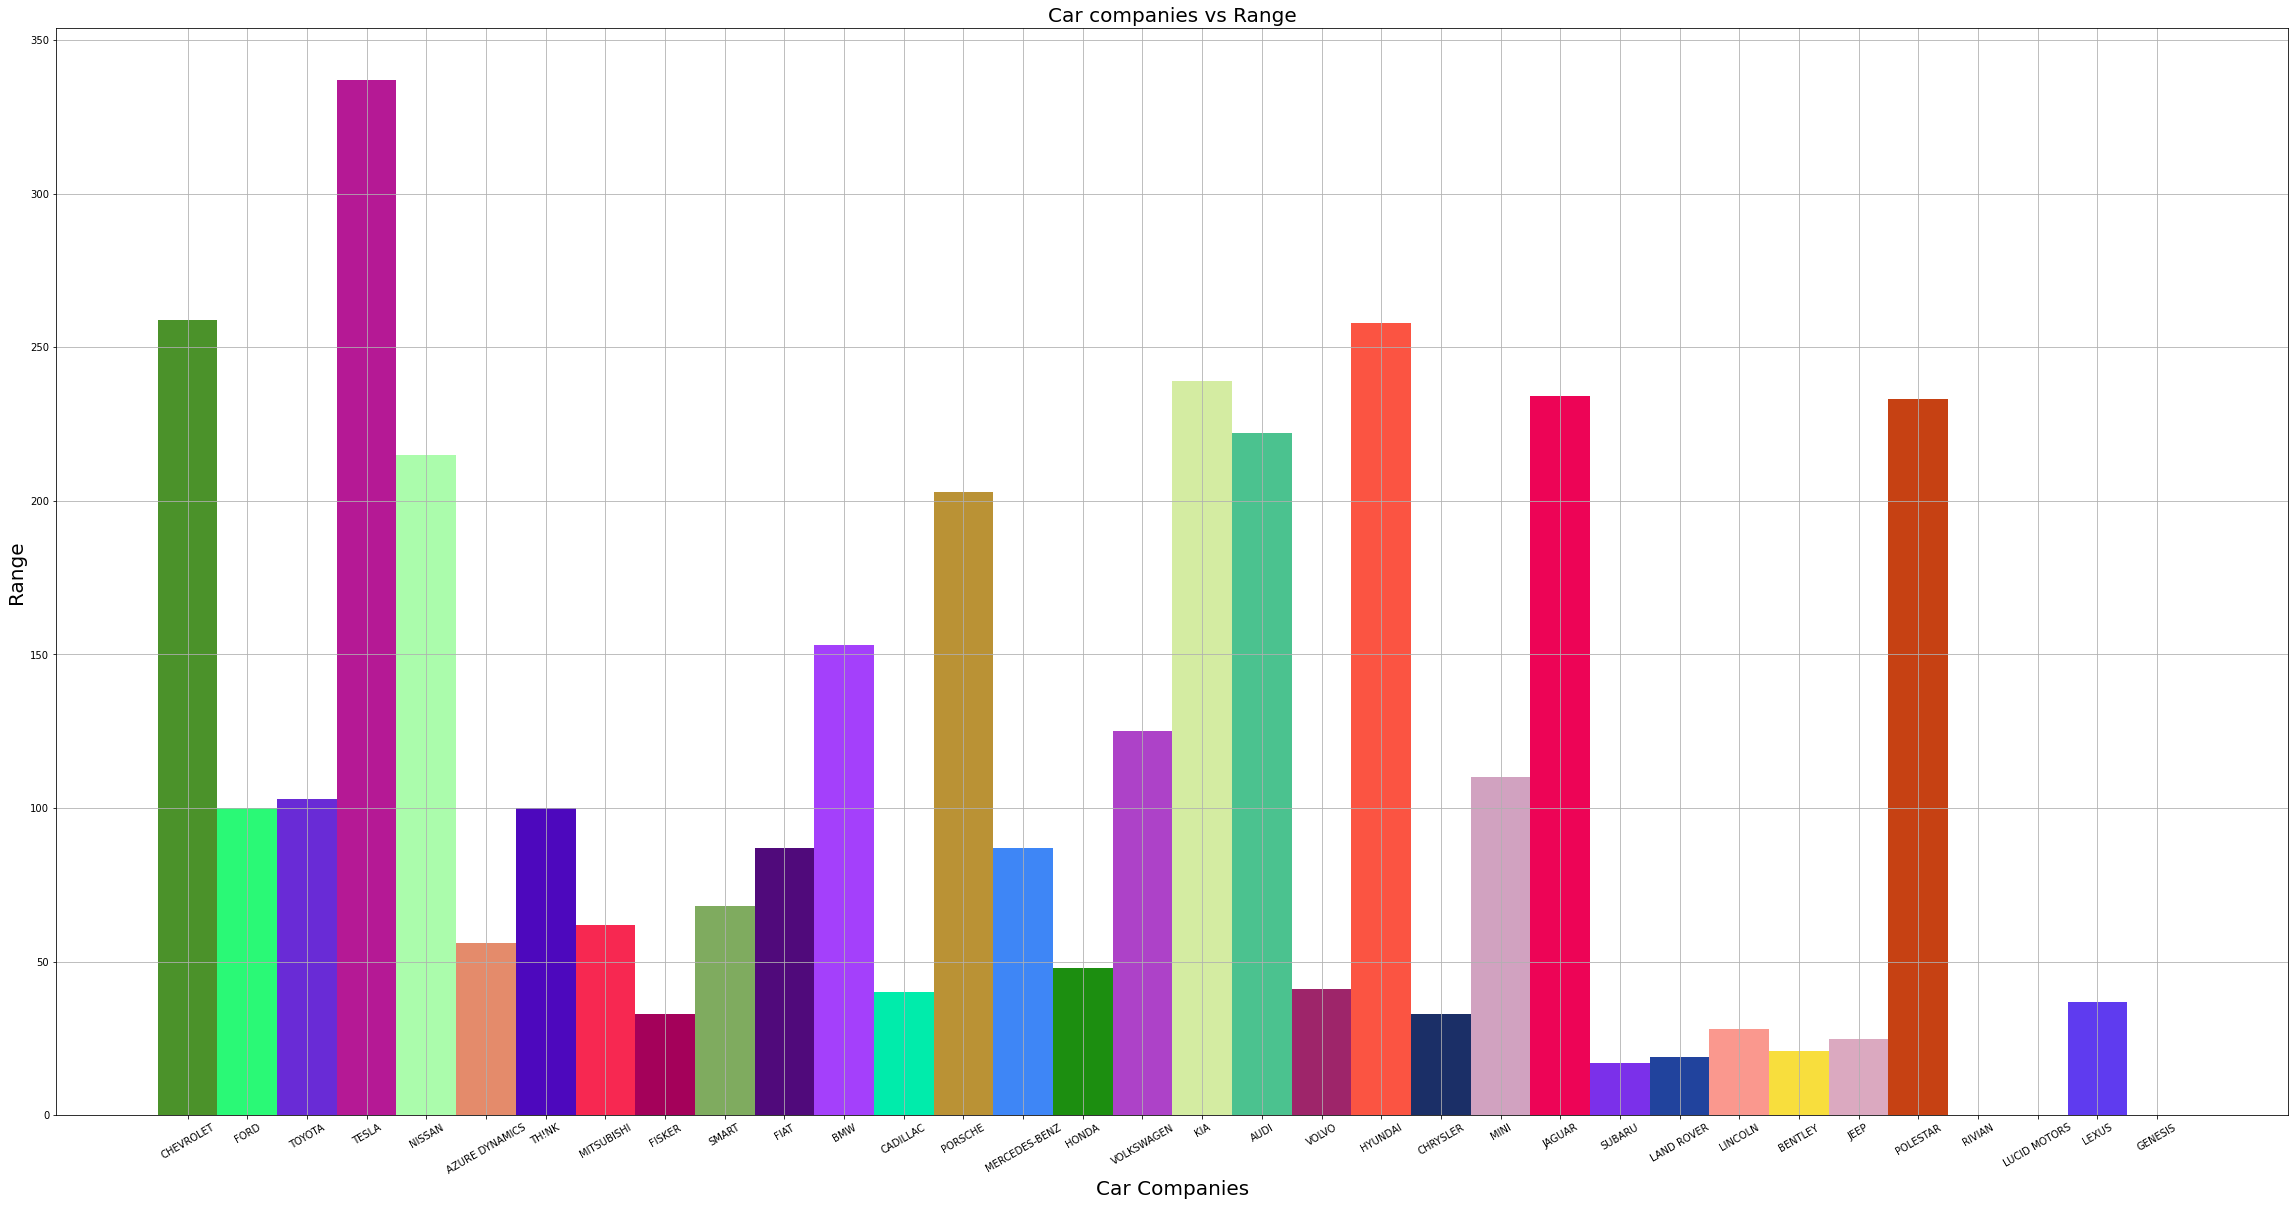

In [161]:
unique_car_companies = useful_data["Make"].unique()

useful_data.rename(columns = {'Electric Range':'Electric_Range'}, inplace = True)

car_with_rangeList = dict()

for i in unique_car_companies:
    temp_array = []
    for make, Electric_Range in zip(useful_data["Make"],useful_data["Electric_Range"]):
        if make == i:
            temp_array.append(Electric_Range)
    
    car_with_rangeList[i] = temp_array
    
    
max_Range_for_car_company = []
for k in car_with_rangeList:
    max_Range_for_car_company.append(np.max(car_with_rangeList[k]))
    
no_of_colors=len(unique_car_companies)
color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
       for j in range(no_of_colors)]



colors = color
plt.figure(figsize=(40, 20))
plt.bar(unique_car_companies, max_Range_for_car_company, color=colors,width = 1)
plt.xticks(rotation=30)
plt.title('Car companies vs Range', fontsize=20)
plt.xlabel('Car Companies', fontsize=20)
plt.ylabel('Range', fontsize=20)
plt.grid(True)
plt.show()


Here I was making a scatter plot for the major car companies worldwide. The reason why I left out a few of the car companies was because some of them were not commercialized enough to really put them in a graph for comparison. For example polestar sold 29,000 units in thier Q4 while Tesla sold 308,000 vehicles in thier Q4. For this drastic difference in sales, majority of people will go for a more popular company rather than a more recent one. With this in mind, I made a scatter plot for each car company on the range compared to the years that were produced. From majority of the graphs, the ranges are in a steady increase that from 2000 to the 2019s. Then in 2022 there is a massive dip in the electrical range for most car companies. This implies that either the ranges are decreased because the data census has not been fully retrevied yet/accurate or that there is a possibility that most of the recent cars are now for commuting. This makes sense because these days more and more cars have increased electrical range but is sort of pointless. However, highly likely it's the first reason which means that it's more accurate to look a the years to 2019 where the results are more accuruate. In that case, for most car companies, all of the electrical range for each of the car companies have increased a lot. Most of the scatter plot data shows the increase is more exponential rather than linear.

![Graph for electrical range increase](https://electrek.co/wp-content/uploads/sites/3/2022/08/EV-range-US-2016-2022.jpg)

Most people that buy an electric car will typically stay close to a city and not use their car for travel as charging stations become more and more. As shown below, most charging stations are closer to the cities rather than the places where it is more spacious.

In [193]:
import geopandas as gpd
import geojson
import json


m = folium.Map(location=[48, -102],zoom_start=3)

with open("Alternative_Fueling_Stations.geojson") as f:
    data = json.load(f)
    
for i in range(len(data["features"])):
    properties = data["features"][i]["properties"]
    #print(properties["latitude"],properties["longitude"])
    folium.Marker([properties["latitude"], properties["longitude"]]).add_to(m)
    
m

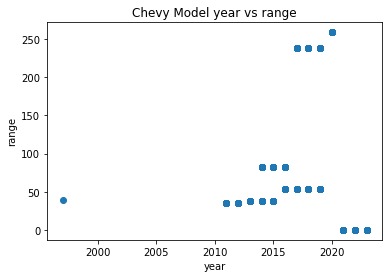

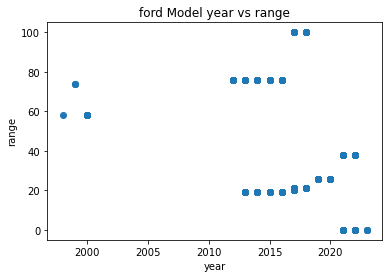

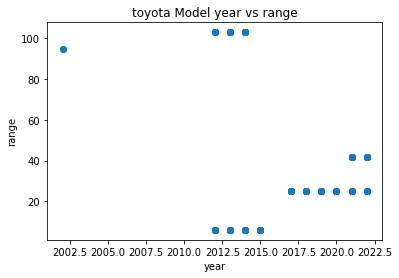

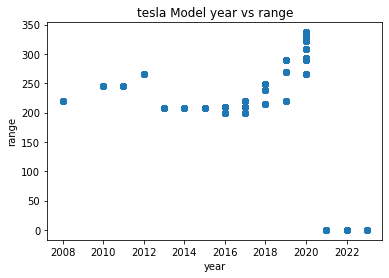

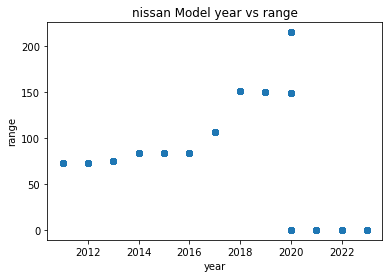

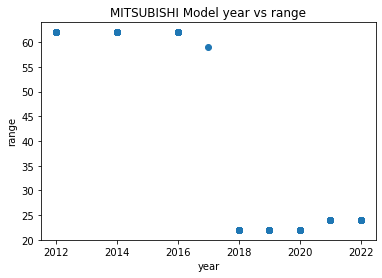

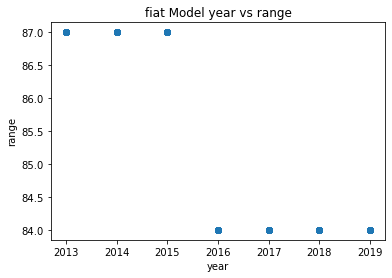

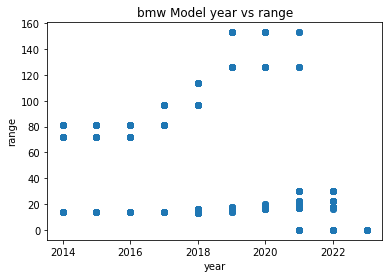

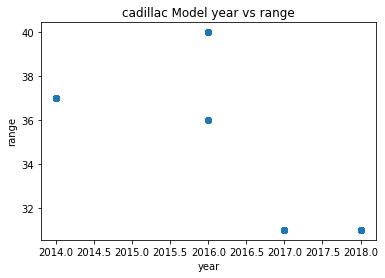

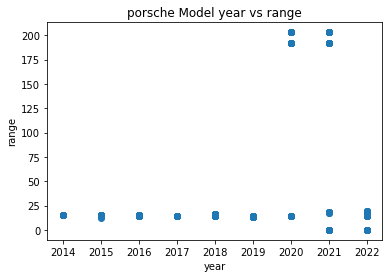

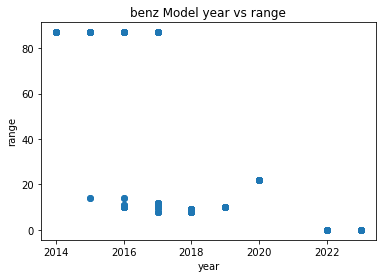

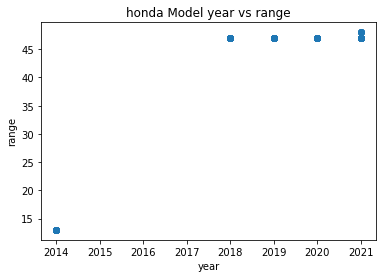

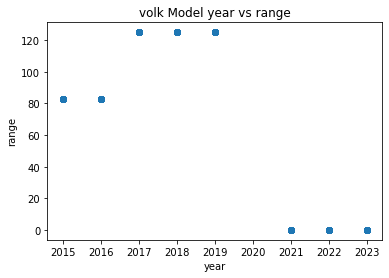

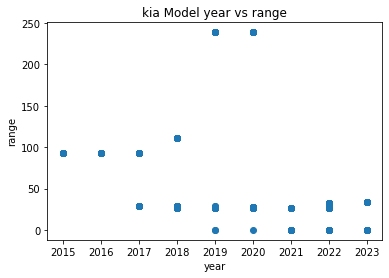

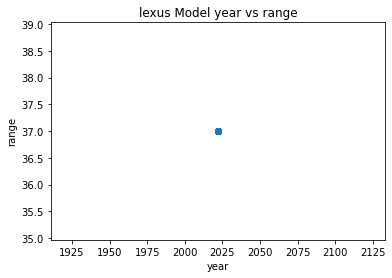

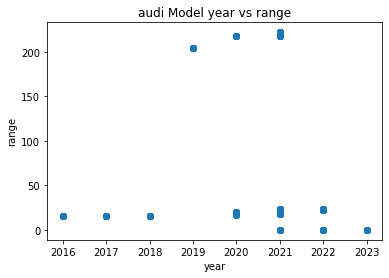

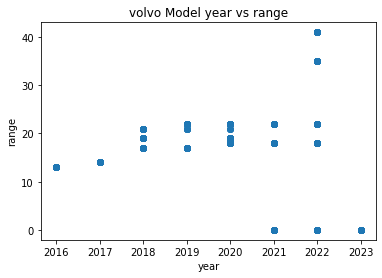

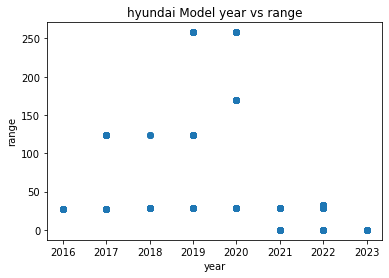

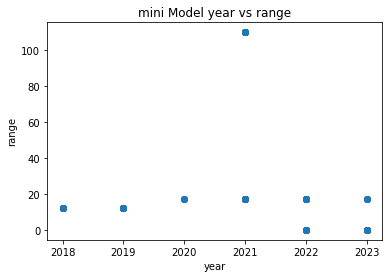

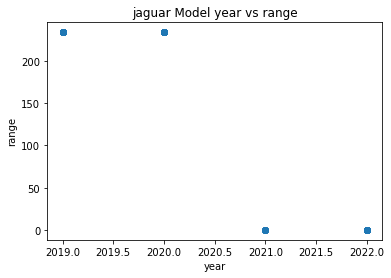

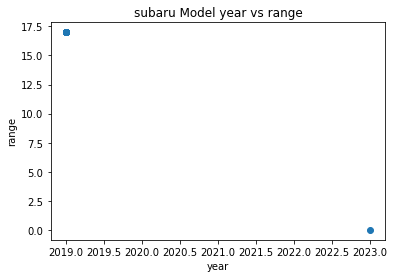

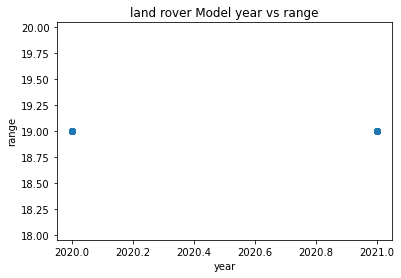

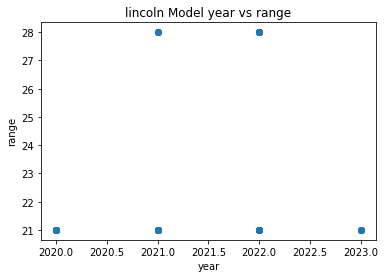

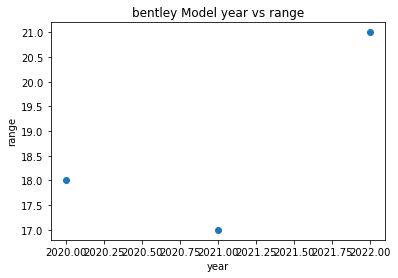

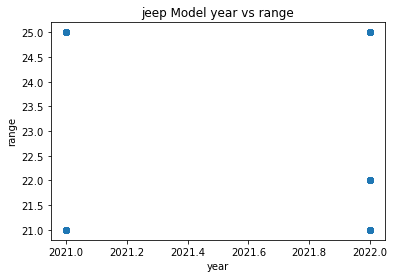

In [188]:
#Scatter plot for each car company and year vs Range of major car companies

years = useful_data["Model Year"].unique()

chevy_range = car_with_rangeList["CHEVROLET"]
chevy_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "CHEVROLET":
        chevy_year.append(year)
        
chevy_plot = plt.scatter(chevy_year, chevy_range)
chevy_plot = plt.title("Chevy Model year vs range")
chevy_plot = plt.xlabel("year") #x label
chevy_plot = plt.ylabel("range") #y label
plt.show()


ford_range = car_with_rangeList["FORD"]
ford_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "FORD":
        ford_year.append(year)
        
ford_plot = plt.scatter(ford_year, ford_range)
ford_plot = plt.title("ford Model year vs range")
ford_plot = plt.xlabel("year") #x label
ford_plot = plt.ylabel("range") #y label
plt.show()


toyota_range = car_with_rangeList["TOYOTA"]
toyota_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "TOYOTA":
        toyota_year.append(year)
        
toyota_plot = plt.scatter(toyota_year, toyota_range)
toyota_plot = plt.title("toyota Model year vs range")
toyota_plot = plt.xlabel("year") #x label
toyota_plot = plt.ylabel("range") #y label
plt.show()


tesla_range = car_with_rangeList["TESLA"]
tesla_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "TESLA":
        tesla_year.append(year)
        
tesla_plot = plt.scatter(tesla_year, tesla_range)
tesla_plot = plt.title("tesla Model year vs range")
tesla_plot = plt.xlabel("year") #x label
tesla_plot = plt.ylabel("range") #y label
plt.show()


nissan_range = car_with_rangeList["NISSAN"]
nissan_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "NISSAN":
        nissan_year.append(year)
        
nissan_plot = plt.scatter(nissan_year, nissan_range)
nissan_plot = plt.title("nissan Model year vs range")
nissan_plot = plt.xlabel("year") #x label
nissan_plot = plt.ylabel("range") #y label
plt.show()



m_range = car_with_rangeList["MITSUBISHI"]
m_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "MITSUBISHI":
        m_year.append(year)
        
m_plot = plt.scatter(m_year, m_range)
m_plot = plt.title("MITSUBISHI Model year vs range")
m_plot = plt.xlabel("year") #x label
m_plot = plt.ylabel("range") #y label
plt.show()


fiat_range = car_with_rangeList["FIAT"]
fiat_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "FIAT":
        fiat_year.append(year)
        
fiat_plot = plt.scatter(fiat_year, fiat_range)
fiat_plot = plt.title("fiat Model year vs range")
fiat_plot = plt.xlabel("year") #x label
fiat_plot = plt.ylabel("range") #y label
plt.show()

bmw_range = car_with_rangeList["BMW"]
bmw_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "BMW":
        bmw_year.append(year)
        
bmw_plot = plt.scatter(bmw_year, bmw_range)
bmw_plot = plt.title("bmw Model year vs range")
bmw_plot = plt.xlabel("year") #x label
bmw_plot = plt.ylabel("range") #y label
plt.show()

cad_range = car_with_rangeList["CADILLAC"]
cad_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "CADILLAC":
        cad_year.append(year)
        
cad_plot = plt.scatter(cad_year, cad_range)
cad_plot = plt.title("cadillac Model year vs range")
cad_plot = plt.xlabel("year") #x label
cad_plot = plt.ylabel("range") #y label
plt.show()

por_range = car_with_rangeList["PORSCHE"]
por_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "PORSCHE":
        por_year.append(year)
        
por_plot = plt.scatter(por_year, por_range)
por_plot = plt.title("porsche Model year vs range")
por_plot = plt.xlabel("year") #x label
por_plot = plt.ylabel("range") #y label
plt.show()

benz_range = car_with_rangeList["MERCEDES-BENZ"]
benz_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "MERCEDES-BENZ":
        benz_year.append(year)
        
benz_plot = plt.scatter(benz_year, benz_range)
benz_plot = plt.title("benz Model year vs range")
benz_plot = plt.xlabel("year") #x label
benz_plot = plt.ylabel("range") #y label
plt.show()


hon_range = car_with_rangeList["HONDA"]
hon_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "HONDA":
        hon_year.append(year)
        
hon_plot = plt.scatter(hon_year, hon_range)
hon_plot = plt.title("honda Model year vs range")
hon_plot = plt.xlabel("year") #x label
hon_plot = plt.ylabel("range") #y label
plt.show()


volk_range = car_with_rangeList["VOLKSWAGEN"]
volk_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "VOLKSWAGEN":
        volk_year.append(year)
        
volk_plot = plt.scatter(volk_year, volk_range)
volk_plot = plt.title("volk Model year vs range")
volk_plot = plt.xlabel("year") #x label
volk_plot = plt.ylabel("range") #y label
plt.show()


kia_range = car_with_rangeList["KIA"]
kia_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "KIA":
        kia_year.append(year)
        
kia_plot = plt.scatter(kia_year, kia_range)
kia_plot = plt.title("kia Model year vs range")
kia_plot = plt.xlabel("year") #x label
kia_plot = plt.ylabel("range") #y label
plt.show()


lex_range = car_with_rangeList["LEXUS"]
lex_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "LEXUS":
        lex_year.append(year)
        
lex_plot = plt.scatter(lex_year, lex_range)
lex_plot = plt.title("lexus Model year vs range")
lex_plot = plt.xlabel("year") #x label
lex_plot = plt.ylabel("range") #y label
plt.show()


audi_range = car_with_rangeList["AUDI"]
audi_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "AUDI":
        audi_year.append(year)
        
audi_plot = plt.scatter(audi_year, audi_range)
audi_plot = plt.title("audi Model year vs range")
audi_plot = plt.xlabel("year") #x label
audi_plot = plt.ylabel("range") #y label
plt.show()


vol_range = car_with_rangeList["VOLVO"]
vol_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "VOLVO":
        vol_year.append(year)
        
vol_plot = plt.scatter(vol_year, vol_range)
vol_plot = plt.title("volvo Model year vs range")
vol_plot = plt.xlabel("year") #x label
vol_plot = plt.ylabel("range") #y label
plt.show()


hyun_range = car_with_rangeList["HYUNDAI"]
hyun_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "HYUNDAI":
        hyun_year.append(year)
        
hyun_plot = plt.scatter(hyun_year, hyun_range)
hyun_plot = plt.title("hyundai Model year vs range")
hyun_plot = plt.xlabel("year") #x label
hyun_plot = plt.ylabel("range") #y label
plt.show()


mini_range = car_with_rangeList["MINI"]
mini_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "MINI":
        mini_year.append(year)
        
mini_plot = plt.scatter(mini_year, mini_range)
mini_plot = plt.title("mini Model year vs range")
mini_plot = plt.xlabel("year") #x label
mini_plot = plt.ylabel("range") #y label
plt.show()


jag_range = car_with_rangeList["JAGUAR"]
jag_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "JAGUAR":
        jag_year.append(year)
        
jag_plot = plt.scatter(jag_year, jag_range)
jag_plot = plt.title("jaguar Model year vs range")
jag_plot = plt.xlabel("year") #x label
jag_plot = plt.ylabel("range") #y label
plt.show()


sub_range = car_with_rangeList["SUBARU"]
sub_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "SUBARU":
        sub_year.append(year)
        
sub_plot = plt.scatter(sub_year, sub_range)
sub_plot = plt.title("subaru Model year vs range")
sub_plot = plt.xlabel("year") #x label
sub_plot = plt.ylabel("range") #y label
plt.show()


lr_range = car_with_rangeList["LAND ROVER"]
lr_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "LAND ROVER":
        lr_year.append(year)
        
lr_plot = plt.scatter(lr_year, lr_range)
lr_plot = plt.title("land rover Model year vs range")
lr_plot = plt.xlabel("year") #x label
lr_plot = plt.ylabel("range") #y label
plt.show()


linc_range = car_with_rangeList["LINCOLN"]
linc_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "LINCOLN":
        linc_year.append(year)
        
linc_plot = plt.scatter(linc_year, linc_range)
linc_plot = plt.title("lincoln Model year vs range")
linc_plot = plt.xlabel("year") #x label
linc_plot = plt.ylabel("range") #y label
plt.show()


ben_range = car_with_rangeList["BENTLEY"]
ben_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "BENTLEY":
        ben_year.append(year)
        
ben_plot = plt.scatter(ben_year, ben_range)
ben_plot = plt.title("bentley Model year vs range")
ben_plot = plt.xlabel("year") #x label
ben_plot = plt.ylabel("range") #y label
plt.show()



jeep_range = car_with_rangeList["JEEP"]
jeep_year = []

for year, carName in zip(useful_data["Model Year"],useful_data["Make"]):
    if carName == "JEEP":
        jeep_year.append(year)
        
jeep_plot = plt.scatter(jeep_year, jeep_range)
jeep_plot = plt.title("jeep Model year vs range")
jeep_plot = plt.xlabel("year") #x label
jeep_plot = plt.ylabel("range") #y label
plt.show()

### Linear regression model


For the linear regression model, I wanted to try and create a line compared to the electrical range and the years the cars were built. As shown in the graph, the blue dots represent the car models while the line represents the average range every year. What seems strange is that the line shows a decrease in average of electrical range over the years. At the same time, most car companies who created electrical cars will not create long range veichles for a while.

Coefficients: 
 [[-10.20501191]]
Mean squared error: 2234.06
Variance score: 0.28


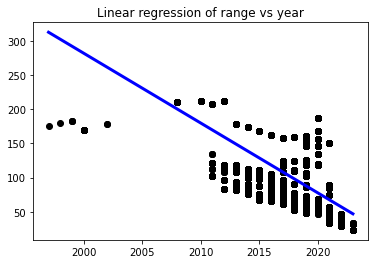

In [135]:
#Linear regression model

car_x = np.array(useful_data["Model Year"])
car_y = np.array(useful_data["Electric_Range"])
data_x_train = car_x.reshape(-1,1)
data_y_train = car_y.reshape(-1,1)

regr = linear_model.LinearRegression()

regr.fit(data_x_train,data_y_train)

co_eff = regr.coef_
intercept = regr.intercept_

temp_c = []
yearz = []
mean_c = []


for car in unique_car_companies:
    for year in years:
        mean = useful_data.loc[(useful_data['Make'] == car ) & (useful_data['Model Year'] == year )].Electric_Range.mean(axis =0)
        mean_c.append(mean)
        temp_c.append(car)
        yearz.append(year)
        
        
d = {'car': temp_c, 'year':yearz, 'mean': mean_c}
data_mean = pd.DataFrame(data = d)

#data_mean

inter_term = []
for index, row in useful_data.iterrows():
    
    #m which is the mean is used as the interaction term
    m = data_mean.loc[(data_mean['year'] == row['Model Year']) & (data_mean['car'] == row['Make'])]['mean']
  
    #y is the new expected y value
    y = 0.5 * (intercept[0] + co_eff[0,0]*row['Model Year']) + (0.5 * float(m))
    inter_term.append(y )
    
    
useful_data['continent year interaction'] = inter_term

data_was = np.array(inter_term)




data_train = useful_data.sample(frac=0.66, replace=True,axis = 0)
data_test = useful_data.sample(frac=0.46, replace=True,axis = 0)

data_x_train = car_x.reshape(-1,1) 
data_x_test = car_x.reshape(-1,1)

data_y_train = data_was.reshape(-1,1)
data_y_test =data_was.reshape(-1,1)

regr2 = linear_model.LinearRegression()

regr2.fit(data_x_train, data_y_train)

co_eff = regr2.coef_
variance =  regr2.score(data_x_test, data_y_test)
mean_sq_err2 = np.mean((regr2.predict(data_x_test) - data_y_test) ** 2)
intercept = regr2.intercept_

print('Coefficients: \n', regr2.coef_)
print("Mean squared error: %.2f"
      % np.mean((regr2.predict(data_x_test) - data_y_test) ** 2))
print('Variance score: %.2f' % regr2.score(data_x_test, data_y_test))

plt.scatter(data_x_test, data_y_test,  color='black')
plt.plot(data_x_test, regr2.predict(data_x_test), color='blue',
         linewidth=3)


plt.title("Linear regression of range vs year")
plt.show()



Here I created a bar char to differentiate between the hybrid plug-ins and the electric car range. As clearly shown, Hybrids tend to have less range than electrical battery-run cars. So the question is why are hybrid vehicles accounted for only 4.9 percent of the market, while fully electric vehicles make up 2.3 percent. Truth is, full electrical cars always had a bad reputation for many years as being heavy, not lasting long, having limited range, and not being very smart. However, since times have changed, electric cars have become way more efficient and way better since the 2010s. Hybrid cars will be more dominant for a few more years because most car companies make hybrid cars rather than fully electric cars. I believe in the future that more people will eventually buy fully electrical cars since they will dominate the market more and more as the years' pass.

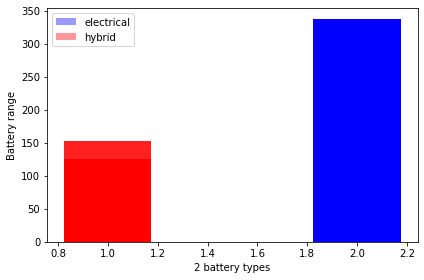

In [205]:
import re

battery = useful_data["Electric Vehicle Type"].unique()

plug_in_hybrid = "(BEV)"
Electric_word = "(PHEV)"
Plug_in = []
full_electric = []

car_plug_in = []
electric_cars = []


for electric_range, type_electric,car_type in zip(useful_data["Electric_Range"],useful_data["Electric Vehicle Type"],
                                                 useful_data["Make"]):
    mat = re.search("[a-zA-Z]+(?:\s*(\([^()]*\)))",type_electric)
    if mat.group(1) == plug_in_hybrid:
        Plug_in.append(electric_range)
        car_plug_in.append(car_type)
    elif mat.group(1) == Electric_word:
        full_electric.append(electric_range)
        electric_cars.append(car_type)
            



opacity = 0.4
bar_width = 0.35


plt.xlabel('2 battery types')
plt.ylabel('Battery range')

plt.xticks(label=["Hybrid plug in","Electrical"])
bar1 = plt.bar(2, Plug_in, bar_width, align='center', alpha=opacity, color='b',label="hybrid")
bar2 = plt.bar(1, full_electric, bar_width, align='center', alpha=opacity, color='r',label="electrical")
plt.legend((bar1[0], bar2[0]), ('electrical', 'hybrid'))

plt.tight_layout()
plt.show()

## Conclusion

In conlusion, after comparing the different models of the different car companies, I found this research to be super fasinating.

It would be super interesting to see what the potential the future has in for the human race. Since hydrogen cars have been also started production. In fact it is estimated that by 2025, hydrogen cars will be in mass production by majority of the big car companies listed here.

Truthly for me, electrical cars have never been my thing, I'm more of a petrol head who rather has a 700 hp v8 engine roaring that thing in the middle of the streets. Howvever, electric cars are very attractive since they have a very sleek design.